In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv("loan_data.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


ada perbedaan value, maka itu adalah missing values

In [5]:
loan.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.dropna().isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan.duplicated().sum()

np.int64(0)

In [8]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

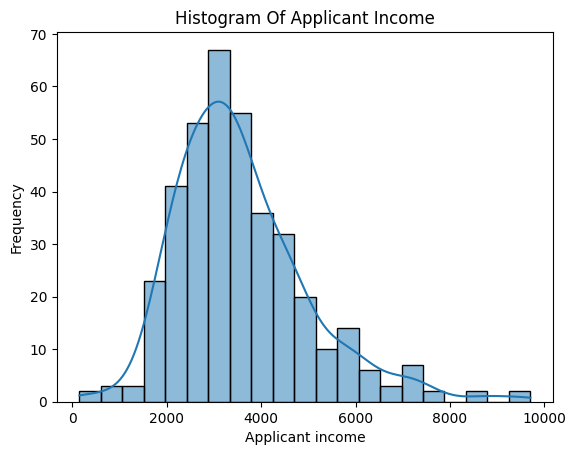

In [9]:
sns.histplot(loan["ApplicantIncome"], kde=True)
plt.title("Histogram Of Applicant Income") 
plt.xlabel("Applicant income")
plt.ylabel("Frequency")
plt.show()

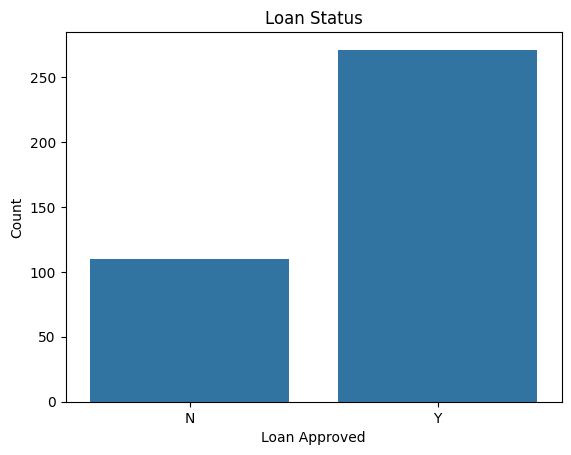

In [10]:
sns.countplot(x="Loan_Status", data=loan)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [11]:
loan.groupby("Education")["LoanAmount"].mean().reset_index

<bound method Series.reset_index of Education
Graduate        105.190647
Not Graduate    104.436893
Name: LoanAmount, dtype: float64>

In [12]:
# rata rata jumlah pinjaman berdasarkan edukasi
avg_loan_amount_by_education = loan.groupby("Education")["LoanAmount"].mean().reset_index()

In [13]:
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.190647
1,Not Graduate,104.436893


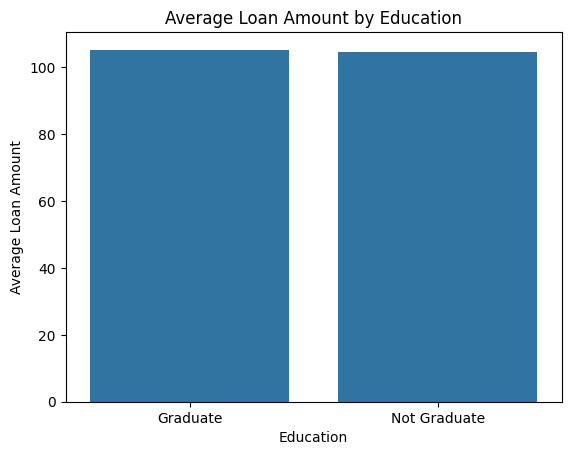

In [14]:
sns.barplot(x="Education", y = "LoanAmount", data = avg_loan_amount_by_education)
plt.title("Average Loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

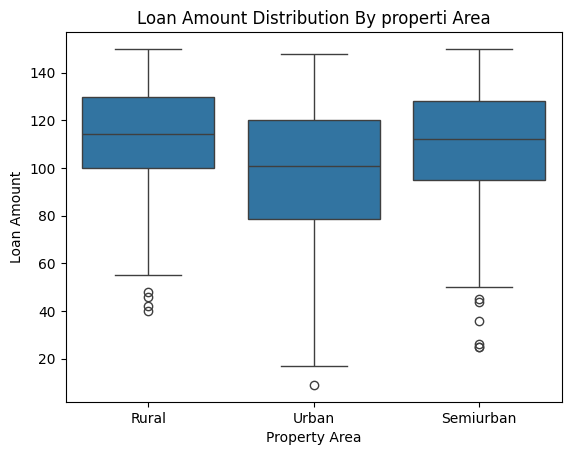

In [15]:
sns.boxplot(x="Property_Area", y = "LoanAmount", data = loan)
plt.title("Loan Amount Distribution By properti Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

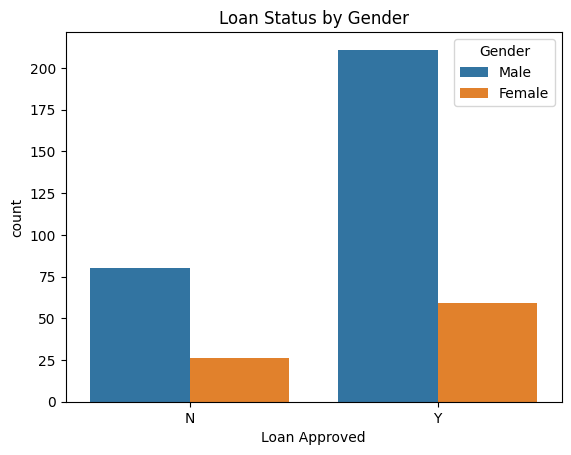

In [16]:
sns.countplot(x = "Loan_Status", hue = "Gender", data = loan)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("count")
plt.show()

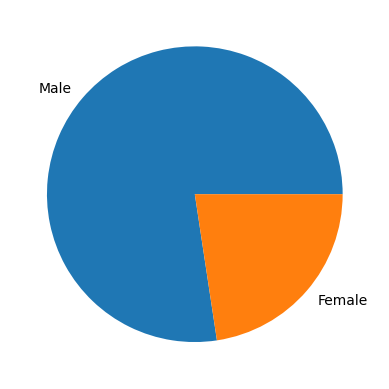

In [17]:
loan["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [18]:
loan_status_by_married = loan.groupby("Married")["Loan_Status"].value_counts()
loan_status_by_married

Married  Loan_Status
No       Y              101
         N               52
Yes      Y              170
         N               58
Name: count, dtype: int64

In [19]:
loan_status_by_married = loan.groupby("Married")["Loan_Status"].value_counts().unstack() # untsack = merapikan tabel
loan_status_by_married

Loan_Status,N,Y
Married,,
No,52,101
Yes,58,170


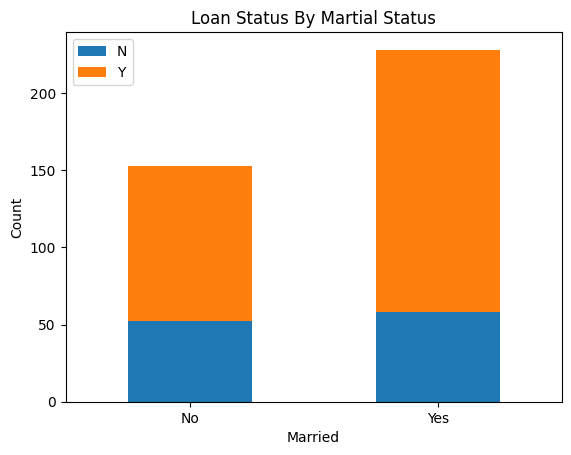

In [20]:
loan_status_by_married.plot(kind="bar", stacked=True)
plt.title("Loan Status By Martial Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=0)
plt.show()

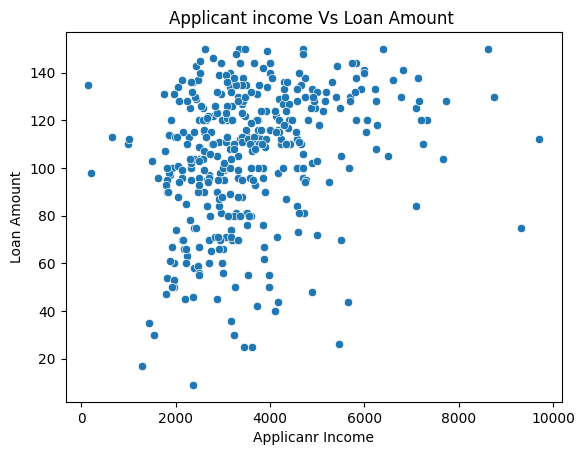

In [21]:
# scatter plot
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data = loan)
plt.title("Applicant income Vs Loan Amount ")
plt.xlabel("Applicanr Income")
plt.ylabel("Loan Amount")
plt.show()

In [22]:
# memfilter numeric df
numeric_df = loan.select_dtypes(include=["int64", "float64"])

In [23]:
numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [24]:
# correlation matrix
correlation_matrix = numeric_df.corr() 
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


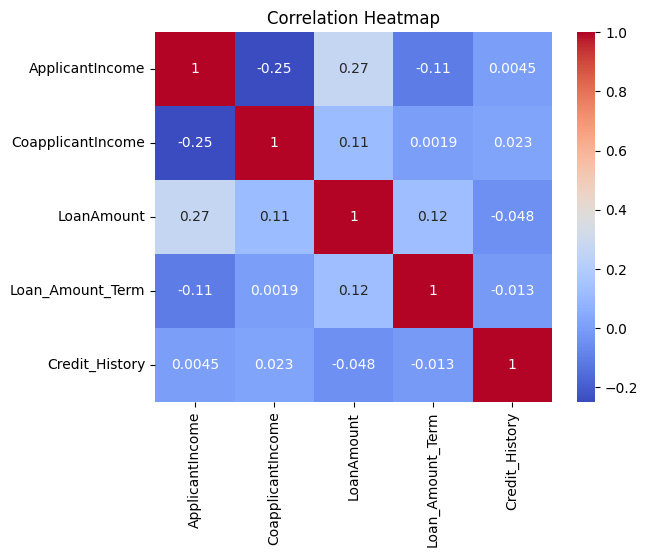

In [25]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
avg_term_by_employed = loan.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()

In [28]:
avg_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.321767
1,Yes,326.181818


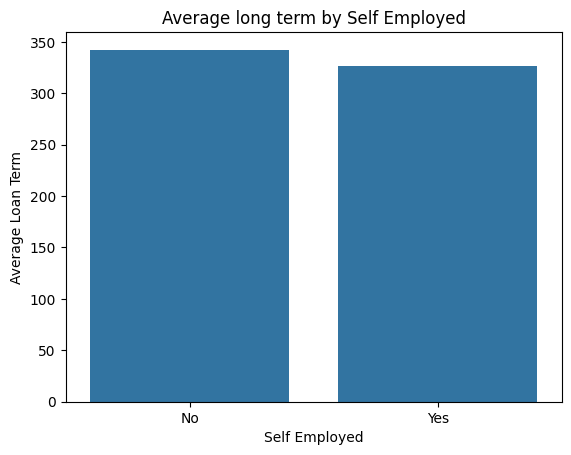

In [29]:
sns.barplot(x="Self_Employed", y="Loan_Amount_Term", data = avg_term_by_employed)
plt.title("Average long term by Self Employed")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()

In [30]:
loan["Credit_History"].unique()

array([ 1., nan,  0.])

In [31]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


# Split Dataset

In [32]:
X = loan[["Married", "ApplicantIncome", "Education", "LoanAmount", "Credit_History"]]

In [33]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [34]:
Y = loan["Loan_Status"]

In [35]:
Y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 381, dtype: object

# Encoding

In [36]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [37]:
y_encoded = labelencoder.fit_transform(Y)

In [38]:
y_encoded

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [39]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [40]:
X["Credit_History"][0]

np.float64(1.0)

In [41]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [42]:
X["Married"] = labelencoder.fit_transform(X["Married"])

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_19052\221913637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = labelencoder.fit_transform(X["Married"])


In [43]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,Graduate,128.0,1.0
1,1,3000,Graduate,66.0,1.0
2,1,2583,Not Graduate,120.0,1.0
3,0,6000,Graduate,141.0,1.0
4,1,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,1,5703,Graduate,128.0,1.0
377,1,3232,Graduate,108.0,1.0
378,0,2900,Graduate,71.0,1.0
379,1,4106,Graduate,40.0,1.0


In [44]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [45]:
X["Education"] = labelencoder.fit_transform(X['Education'])

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_19052\1389465455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = labelencoder.fit_transform(X['Education'])


In [46]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


#  Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X = scaler.fit_transform(X)

In [49]:
X

array([[ 0.81917802,  0.70746877, -0.60869007,  0.81257519,  0.44031529],
       [ 0.81917802, -0.40893221, -0.60869007, -1.37659578,  0.44031529],
       [ 0.81917802, -0.70301888,  1.64287222,  0.53010151,  0.44031529],
       ...,
       [-1.22073588, -0.47945659, -0.60869007, -1.20004974,  0.44031529],
       [ 0.81917802,  0.37106746, -0.60869007, -2.29463522,  0.44031529],
       [-1.22073588,  0.70746877, -0.60869007,  0.98912123, -2.2710999 ]],
      shape=(381, 5))

In [50]:
import joblib
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']

# Pemodelan

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
def modelperfom(predicitons):
 print("Accuracy in model os {}".format(accuracy_score(y_test, predicitons)))

In [54]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [55]:
print(np.isnan(X).sum())

30


In [56]:
mask_no_nan = ~np.isnan(x_train).any(axis=1)

In [57]:
mask_no_nan = ~np.isnan(x_test).any(axis=1)

In [58]:
x_train_clean = x_train[mask_no_nan]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 304 but size of corresponding boolean axis is 77

In [ ]:
Y_train_clean = y_train[mask_no_nan]

In [ ]:
x_test_clean = x_test[mask_no_nan]

In [ ]:
Y_test_clean = y_test[mask_no_nan]

In [ ]:
print(np.isnan(X).sum())

30


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train_clean,Y_train_clean)

LogisticRegression()

In [ ]:
log_model.predict(x_test_clean)

array(['Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)